## How Fukuro's Odometry Works
Created by Marco Aland Adinanda - FukuroV8

### 0. Setup Simluation Code

In [8]:
from math import sin, cos, radians
import numpy as np

class CalculateOdometry:
  def __init__(self, mode : str = 'motor'):
    if mode.lower() == 'motor':
      self.B = np.array([[cos(radians(30)), sin(radians(30)), 0.185],
                        [-cos(radians(30)), sin(radians(30)), 0.185],
                        [0                , -1              , 0.185]])
    elif mode.lower() == 'freewheel':
      self.B = np.array([[-cos(radians(30)), -sin(radians(30)), 0.08125],
                        [  cos(radians(30)), -sin(radians(30)), 0.08125],
                        [  0               , 1.0              , 0.08125]])
    else:
      raise Exception('wrong mode!')

    self.B_inv = np.linalg.inv(self.B)

  def forward_kinematics(self, Vx, Vy, Vw ,visualize : bool = False) -> np.array:
    v_vec = np.array([Vx, Vy, Vw]).reshape(3, 1)
    result = self.B @ v_vec
    if visualize:
      print('Calculation:')
      print(self.B)
      print('dot')
      print(v_vec)
    print('Result:')
    return result # dot product

  def inverse_kinematics(self, q1, q2, q3, visualize : bool = False) -> np.array:
    q_vec = np.array([q1, q2, q3])
    result = self.B_inv @ q_vec
    if visualize:
      print('Calculation:')
      print(self.B)
      print('dot')
      print(q_vec)
    print('Result:')
    return result # dot product

motor_odometry = CalculateOdometry(mode='motor')
freewheel_odometry = CalculateOdometry(mode='freewheel')

### 1. Introduction
- What is odometry?

Odometry is one of many technique are used in robotics to `estimate` a robot's position and orientation based on data obtained from motion sensors: Motor encoder, freewheel encoder, BNO sensor.


- What is forward kinematics and inverse kinematics?

**Forward kinematics** is the process of `determining the position and orientation` given the joint parameters.
**Inverse kinematics** is the process of `determining the joint parameters needed to place the robot at desired position and orientation.` In other words, inverse kinematics is the `reverse of forward kinematics`

### 2. Understand the robot architecture

**Orientation of x-axis and y-axis in local mode**

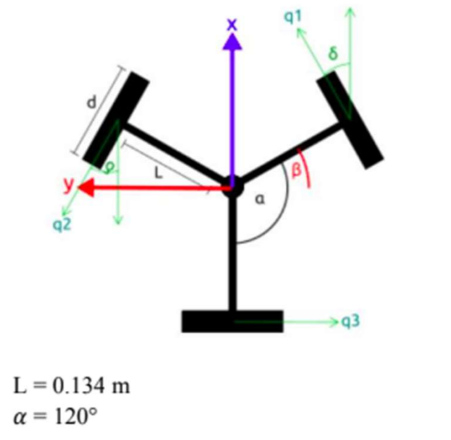

With come trigonometic we obtain the value of δ is 30

### 3. How odometry for motor encoder works?
Maybe some times you are confused about this numbers and you asked yourself after seeing this:

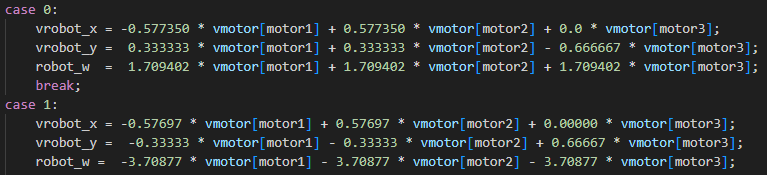


"Where is this numbers comming from?", yep that's the question makes this notebook created. Before answering the question, first we are going to undertand the basic of forward kinematic and inverse kinematics.

**Formula of Forward Kinematics**

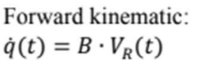

**Variables**

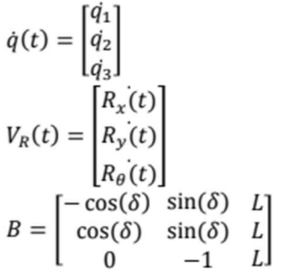



**Formula of Inverse Kinematics**


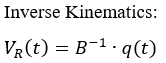

**NOTE**

The formula is created according to the robot architecture from image in section 2.

#### Motor odometry B matrix

In [9]:
print('B matrix')
print(motor_odometry.B)
print('\n')
print('B matrix inversed')
print(motor_odometry.B_inv)

B matrix
[[ 0.8660254  0.5        0.185    ]
 [-0.8660254  0.5        0.185    ]
 [ 0.        -1.         0.185    ]]


B matrix inversed
[[ 0.57735027 -0.57735027  0.        ]
 [ 0.33333333  0.33333333 -0.66666667]
 [ 1.8018018   1.8018018   1.8018018 ]]


The numbers used in image section 3 are from `inverse B matrix`, otherwise `B matrix` is used for simulation or manual controlling with WASD.

#### Simulate the forward kinematics

In [10]:
output_forward = motor_odometry.forward_kinematics(Vx=1, Vy=0, Vw=0, visualize=True)
output_forward

Calculation:
[[ 0.8660254  0.5        0.185    ]
 [-0.8660254  0.5        0.185    ]
 [ 0.        -1.         0.185    ]]
dot
[[1]
 [0]
 [0]]
Result:


array([[ 0.8660254],
       [-0.8660254],
       [ 0.       ]])

When user use manual control and press "W" key the robots starts moving forward, because:
- W: + x-axis
- A: + y-axis
- S: - x-axis
- D: - y-axis

and the magnitude of each key is 1 speed units.

`The forward kinematics is used when we want to achive each motor speed (q1, q2, q3) given the robot linear and angular speed`

`When robot's control system wants to achive particullar linear and angular speed, the desired speed is calculated as input of forward kinematics and it will generate each motor speed to achive target speed.`

#### Simulate the inverse kinematics

In [11]:
output_inverse = motor_odometry.inverse_kinematics(output_forward[0], output_forward[1], output_forward[2], visualize=True)
output_inverse.round()

Calculation:
[[ 0.8660254  0.5        0.185    ]
 [-0.8660254  0.5        0.185    ]
 [ 0.        -1.         0.185    ]]
dot
[[ 0.8660254]
 [-0.8660254]
 [ 0.       ]]
Result:


array([[1.],
       [0.],
       [0.]])

`Inverse kinematics is mainly used in odomtery, because inverse kinematics helps us to get the robot's linear and angular speed given the each motor speed.Output linear and angular speed is used to estimate the robot position on field.`

## 4. How odometry for free wheel works

Freewheels odometry is similiar with motor odometry. The differences is the `+ x-axis and + y-axis.` So the we multiply the first and second column of B matrix we got:

#### 4.1 Freewheel odometry B matix

In [12]:
print('B matrix')
print(freewheel_odometry.B)
print('\n')
print('B matrix inversed')
print(freewheel_odometry.B_inv)

B matrix
[[-0.8660254 -0.5        0.08125  ]
 [ 0.8660254 -0.5        0.08125  ]
 [ 0.         1.         0.08125  ]]


B matrix inversed
[[-0.57735027  0.57735027 -0.        ]
 [-0.33333333 -0.33333333  0.66666667]
 [ 4.1025641   4.1025641   4.1025641 ]]


#### 4.2 Simulate forward kinematics

In [13]:
output_forward_freewheel = freewheel_odometry.forward_kinematics(Vx=1, Vy=0, Vw=0, visualize=True)
output_forward_freewheel

Calculation:
[[-0.8660254 -0.5        0.08125  ]
 [ 0.8660254 -0.5        0.08125  ]
 [ 0.         1.         0.08125  ]]
dot
[[1]
 [0]
 [0]]
Result:


array([[-0.8660254],
       [ 0.8660254],
       [ 0.       ]])

#### 4.3 Simulate inverse kinematics

In [14]:
output_inverse_freewheel = freewheel_odometry.inverse_kinematics(output_forward_freewheel[0], output_forward_freewheel[1], output_forward_freewheel[2], visualize=True)
output_inverse_freewheel.round()

Calculation:
[[-0.8660254 -0.5        0.08125  ]
 [ 0.8660254 -0.5        0.08125  ]
 [ 0.         1.         0.08125  ]]
dot
[[-0.8660254]
 [ 0.8660254]
 [ 0.       ]]
Result:


array([[1.],
       [0.],
       [0.]])